# **MTH377: *Convex Optimization Assessment-2***

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Prisoners' Dilemma as a Bargaining Problem**

This assessment deals with a two-player Prisoners' Dilemma, in which the cooperative payoff possibilities are mathematically described by a polytope $P$ in $\mathbb{R}^{2}$, the convex hull of the payoff vectors $(4, 4)$, $(6, 0)$, $(0, 6)$, and $(0, 0)$.

Assume that the disagreement point is $\mathbf{d} = (d_{1}, d_{2})$.
The notion of a disagreement point introduces the constraint that player $i$ cannot get a payoff below their disagreement point $d_{i}$.

Hence, the feasible set $\mathcal{F}$ of payoff vectors $\mathbf{u} = (u_{1}, u_{2})$ for the problem is mathematically described by the inequalities:

$$\begin{align*}
    u_{1} + 2u_{2} &\leq 12 \\
    2u_{1} + u_{2} &\leq 12 \\
    \mathbf{u} &\geq \mathbf{d} 
\end{align*}$$

In [2]:
import cvxpy
import numpy as np
import numdifftools as nd
from typing import Callable
import matplotlib.pyplot as plt

# Type Aliases
Vector = list[float, float]
Point = list[float, float]
Function = Callable[[Point], float]

### **The Problem Domain $P$**

The polytope $P$ containing the cooperative payoff possibilities is the convex hull of the vertices $(4, 4)$, $(6, 0)$, $(0, 6)$, and $(0, 0)$.

$P$ is shown in the figure generated below.

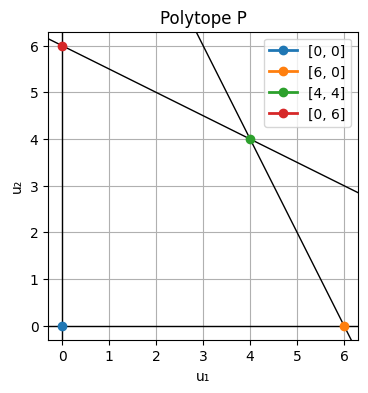

In [3]:
plt.figure(figsize=(4, 4))

points = [[0, 0], [6, 0], [4, 4], [0, 6]]
p1, p2, p3, p4 = points

plt.axline(p1, p2, color="black", linewidth=1)
plt.axline(p2, p3, color="black", linewidth=1)
plt.axline(p3, p4, color="black", linewidth=1)
plt.axline(p4, p1, color="black", linewidth=1)

for point in points:
    plt.plot(point[0], point[1], marker="o", label=point, linewidth=2)

plt.title("Polytope P")
plt.xlabel("u₁")
plt.ylabel("u₂")
plt.grid(True)
plt.legend()
plt.show()

### **Problem Setup**

The following code cell defines all necessary variables and objects for the problem.

In [4]:
# Define the variables and parameters
u1 = cvxpy.Variable()
u2 = cvxpy.Variable()
theta = cvxpy.Parameter()

## **Problem: 1 (5 Points)**

This problem requires us to perform Linear Optimization using the $\texttt{cvxpy}$ Python library.

Given that $W$ is a weighted utilitarian criterion defined for the problem, the following information is known:

$$\begin{align*}
    \mathbf{d} &= (3.5, 2) \\
    W(\mathbf{u}) &= \theta u_{1} + (1 - \theta)u_{2}, \ \theta \in [0, 1]
\end{align*}$$

We are required to find the weighted utilitarian solution of the bargaining problem, which is the linear optimization problem:

$$\max_{\mathbf{u} \in \mathcal{F}} W(\mathbf{u}) = \max_{\mathbf{u} \in \mathcal{F}} \ \theta u_{1} + (1 - \theta)u_{2}, \ \theta \in [0, 1]$$

In [5]:
# Define the constraints
d = d1, d2 = [3.5, 2]
constraints = [
    u1 + 2*u2 <= 12, 2*u1 + u2 <= 12,
    u1 >= d1, u2 >= d2
]

In [6]:
# Define the objective function
W = cvxpy.Maximize(theta * u1 + (1 - theta) * u2)

In [7]:
# Solve the problem for a range of theta values
samples: int = 275

t = np.linspace(0, 1, samples)
soln = np.zeros(samples)

for i in range(samples):
    theta.value = t[i]
    problem = cvxpy.Problem(W, constraints)
    problem.solve()
    soln[i] = u1.value

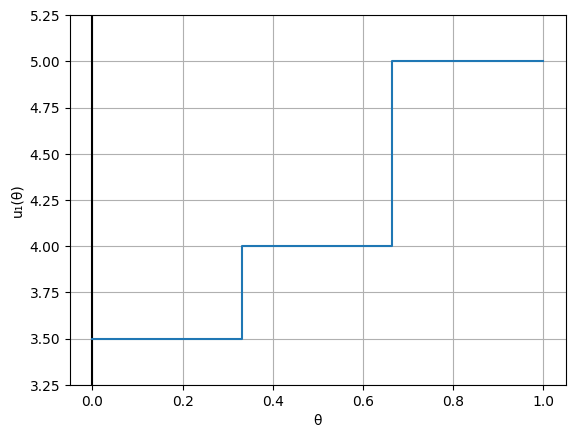

In [8]:
# Plot the function
plt.axvline(x=0, color="black", linewidth=1.5)
plt.step(t, soln)
plt.xlabel("θ")
plt.ylabel("u₁(θ)")
plt.ylim(3.25, 5.25)
plt.grid(True)
plt.show()

## **Problem: 2 (8 Points)**

This problem requires us to perform Convex Optimization using the $\texttt{cvxpy}$ Python library.

Given that $N$ is a Nash welfare criterion defined for the problem, the following information is known:

$$\begin{align*}
    \mathbf{d} &= (3.5, 2) \\
    N(\mathbf{u}) &= \log{(u_{1} - d_{1})} + \log{(u_{2} - d_{2})}
\end{align*}$$

We are required to find the Nash welfare solution of the bargaining problem, which is the convex optimization problem:

$$\max_{\mathbf{u} \in \mathcal{F}} N(\mathbf{u}) = \max_{\mathbf{u} \in \mathcal{F}} \ \log{(u_{1} - d_{1})} + \log{(u_{2} - d_{2})}$$

### **Part (a)**

Find the Nash welfare solution for the bargaining problem and display the solution for $N(\mathbf{u})$, along with the primal optimal value $N(\mathbf{u}^{*})$ and the optimal values of the dual variables for the constraints.

In [9]:
# Define the constraints
d = d1, d2 = [3.5, 2]
constraints = [
    u1 + 2*u2 <= 12, 2*u1 + u2 <= 12,
    u1 >= d1, u2 >= d2
]

In [10]:
# Define the objective function
N = cvxpy.Maximize(cvxpy.log(u1 - d1) + cvxpy.log(u2 - d2))

In [11]:
problem = cvxpy.Problem(N, constraints)
problem.solve()

u = [round(eval(f"u{i}.value.item()"), 5) for i in range(1, 3)]
dual = [round(constraint.dual_value, 5) for constraint in constraints]

print("Nash Bargaining Solution: N =", problem.value)
print("Primal Optimal Solution: u =", u)
print("Optimal Dual Variables:")
print("u₁ + 2u₂ <= 12: λ =", dual[0])
print("2u₂ + u₁ <= 12: μ =", dual[1])
print("u₁ >= d₁: ν =", dual[2])
print("u₂ >= d₂: ρ =", dual[3])

Nash Bargaining Solution: N = 0.11778302005591901
Primal Optimal Solution: u = [4.25, 3.5]
Optimal Dual Variables:
u₁ + 2u₂ <= 12: λ = 0.0
2u₂ + u₁ <= 12: μ = 0.66667
u₁ >= d₁: ν = 0.0
u₂ >= d₂: ρ = 0.0


### **Part (b)**

Fixing the disagreement payoff of player 2 at $d_{2} = 2$, plot how both player's payoffs in Nash bargaining vary as $d_{1}$ varies over the interval $[2, 5]$.

In [12]:
# Define the objective function and solve it for a range of d1
samples: int = 500
d2: float = 2.0

d1 = np.linspace(2, 5, samples)
soln = np.zeros((samples, 2))

for i in range(samples):
    constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d1[i], u2 >= d2]
    problem = cvxpy.Problem(N, constraints)
    problem.solve(solver=cvxpy.SCS)
    soln[i] = [u1.value.item(), u2.value.item()]

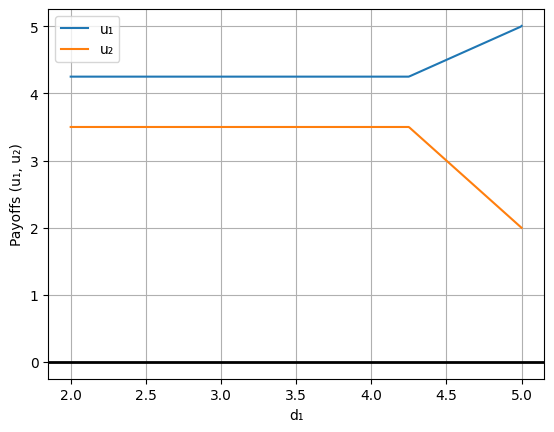

In [13]:
# Plot the payoffs for the range of d1
plt.axhline(y=0, color="black", linewidth=2)
plt.plot(d1, soln[:, 0], label="u₁")
plt.plot(d1, soln[:, 1], label="u₂")
plt.xlabel("d₁")
plt.ylabel("Payoffs (u₁, u₂)")
plt.grid(True)
plt.legend()
plt.show()